### File module 'data_CRUD.py'

In [ ]:
import pandas as pd
class DataProcessing:
    def __init__(self, file_path, records_per_page=20):
        self.file_path = file_path
        self.data = self.load_data()  # Tải dữ liệu từ file CSV dưới dạng DataFrame
        self.records_per_page = records_per_page  # Số dòng hiển thị trên mỗi trang
        self.current_page = 0  # Trang hiện tại
        
    def load_data(self):
        try:
            # Tải dữ liệu từ file CSV dưới dạng DataFrame
            data = pd.read_csv(self.file_path)
            data.columns = data.columns.str.strip().str.replace("'", "")  # Loại bỏ khoảng trắng và dấu nháy đơn
        except FileNotFoundError:
            print(f"File {self.file_path} không tồn tại.")
            data = pd.DataFrame()  # Trả về DataFrame rỗng nếu không tìm thấy file
        return data
    
    def add_record(self, record):
        """Thêm bản ghi vào DataFrame"""
        record_df = pd.DataFrame([record], columns=self.data.columns) # Tạo DataFrame từ bản ghi
        self.data = pd.concat([self.data, record_df], ignore_index=True) # Thêm dữ liệu vào cuối file
        print("Bản ghi đã được thêm.")

    def display_data(self, page=None):
        """ Hiển thị dữ liệu theo trang"""
        if page is not None:
            self.current_page = page
        # Tính toán chỉ số bắt đầu và kết thúc
        start_index = self.current_page * self.records_per_page
        end_index = start_index + self.records_per_page
        # Lấy dữ liệu cho trang hiện tại
        page_data = self.data.iloc[start_index:end_index]
        if page_data.empty:
            print("Không có dữ liệu để hiển thị.")
        else:
            print(page_data)
        return page_data
    
    def describe_data(self):
        """Trả về thông tin mô tả dữ liệu từ file CSV dưới dạng DataFrame."""
        try:
            # Tạo DataFrame mô tả dữ liệu
            description = self.data.describe(include='all').transpose()  # Transpose để dễ đọc
            description.reset_index(inplace=True)  # Chuyển index thành cột 'index'
            description.rename(columns={'index': 'Thuộc tính'}, inplace=True)  # Đổi tên cột index
            return description
        except Exception as e:
            print(f"Lỗi khi mô tả dữ liệu: {e}")
            # Nếu gặp lỗi, trả về DataFrame với thông báo lỗi
            return pd.DataFrame({'Lỗi': [str(e)]})
        
    def get_total_pages(self):
        """Tính tổng số trang dựa trên số dòng trên mỗi trang"""
        total_records = len(self.data)
        total_pages = (total_records // self.records_per_page) + (1 if total_records % self.records_per_page > 0 else 0)
        return total_pages
    
    def next_page(self):
        """Chuyển đến trang tiếp theo."""
        if self.current_page + 1 < self.get_total_pages():
            self.current_page += 1
        else:
            print("Đây là trang cuối cùng.")
        return self.display_data()

    def previous_page(self):
        """Quay về trang trước """
        if self.current_page > 0:
            self.current_page -= 1
        else:
            print("Đây là trang đầu tiên.")
        return self.display_data()
    
    def reset_pagination(self):
        """Đặt lại trang hiện tại về trang đầu tiên"""
        self.current_page = 0
        return self.display_data()
    
    def update_record(self, index, record):
        """Cập nhật bản ghi"""
        if 0 <= index < len(self.data):
            for key, value in record.items():
                if key in self.data.columns:
                    self.data.at[index, key] = value
            print("Bản ghi đã được cập nhật.")
        else:
            print("Vị trí không hợp lệ.")

    def delete_record(self, index):
        """ Xóa bản ghi"""
        if 0 <= index < len(self.data):
            self.data = self.data.drop(index).reset_index(drop=True)
            print("Bản ghi đã được xóa.")
        else:
            print("Vị trí không hợp lệ.")
    def save_data(self):
        """ Lưu dữ liệu vào file CSV """
        self.data.to_csv(self.file_path, index=False)
        print("Dữ liệu đã được lưu thành công.")

### File module 'sap_xep_du_lieu.py'

In [ ]:
# Xác định thứ tự các giá trị trong các cột
value_order = {
    'buying': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1},
    'maint': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1},
    'doors': {'5more': 5, '4': 4, '3': 3, '2': 2},
    'persons': {'more': 3, '4': 2, '2': 1},
    'lug_boot': {'big': 3, 'med': 2, 'small': 1},
    'safety': {'high': 3, 'med': 2, 'low': 1},
    'class': {'vgood': 4, 'good': 3, 'acc': 2, 'unacc': 1}
}
def convert_values(data, column):
    """Chuyển đổi giá trị trong cột thành số dựa trên thứ tự đã xác định."""
    if column not in value_order:
        raise ValueError(f"Cột '{column}' không có thứ tự giá trị được định nghĩa.")
    return data[column].map(value_order[column])
def sort_data(data, sort_column, ascending_order=True):
    """Sắp xếp dữ liệu theo cột và thứ tự giá trị. """
    if sort_column not in value_order:
        raise ValueError(f"Cột '{sort_column}' không thể sắp xếp vì không có thứ tự giá trị được định nghĩa.")
    data[f'{sort_column}_numeric'] = convert_values(data, sort_column)
    sorted_data = data.sort_values(by=f'{sort_column}_numeric', ascending=ascending_order)
    sorted_data = sorted_data.drop(columns=[f'{sort_column}_numeric'])  # Xóa cột 'numeric' sau khi sắp xếp
    return sorted_data


### File module 'visual_data.py'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cars.csv')
def BieuDo1():
    """Biểu đồ phân tích sự phân phối các biến trong đánh giá ô tô"""
    categorical_columns = df.columns[:-1] 
    plt.figure(figsize=(12, 8)) 
    for i, column in enumerate(categorical_columns, 1): 
        plt.subplot(3, 2, i) 
        sns.countplot(x=column, data=df, palette='viridis') 
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()
def BieuDo2():
    """"Biểu đồ phân tích ảnh hưởng của các thuộc tính xe hơi đến đánh giá chất lượng"""
    categorical_columns = df.columns[:-1] 
    plt.figure(figsize=(12,8))
    for i, col in enumerate(categorical_columns): #duyệt qua các cột
        plt.subplot(3, 2, i+1) #vẽ biểu đồ ở hàng 3, cột 2, vị trí
        sns.countplot(data=df,x=col,hue='class') #vẽ biểu đồ bằng seaborn
    plt.tight_layout() #để tránh trùng lắp giữa các biểu đồ
    plt.show()
def BieuDo3():
    """Biểu đồ nhiệt phân tích mối quan hệ giữa giá mua và mức độ an toàn của xe"""
    buying_order = ['low', 'med', 'high', 'vhigh']
    safety_order = ['low', 'med', 'high']
    # Chuyển đổi các cột 'buying' và 'safety' thành kiểu Categorical với thứ tự đã định nghĩa
    df['buying'] = pd.Categorical(df['buying'], categories=buying_order, ordered=True)
    df['safety'] = pd.Categorical(df['safety'], categories=safety_order, ordered=True)
    # Tạo bảng crosstab giữa chi phí mua và độ an toàn, chuẩn hóa theo hàng
    interaction_crosstab = pd.crosstab(df['buying'], df['safety'], normalize='index')
    print(interaction_crosstab)
    # Tạo biểu đồ nhiệt
    plt.figure(figsize=(12, 8))
    sns.heatmap(interaction_crosstab, annot=True, cmap='Blues', fmt='.3f', yticklabels=buying_order[::-1])
    # Thiết lập tiêu đề cho biểu đồ
    plt.title('Buying vs Safety Crosstab Heatmap')
    plt.show()
def BieuDo4():
    """Biểu đồ phân tán thể hiện sự phân bố các lớp xe dựa trên giá mua và chi phí bảo dưỡng"""
    scatter_colors = {'unacc': 'red', 'acc': 'blue', 'good': 'green', 'vgood': 'purple'}
    plt.figure(figsize=(12, 8))
    for category, color in scatter_colors.items():
        subset = df[df['class'] == category]
        plt.scatter(subset['buying'], subset['maint'], label=category, alpha=0.6, color=color)
    plt.title("Scatter Plot of Buying vs Maint by Car Class")
    plt.xlabel("Buying Cost")
    plt.ylabel("Maintenance Cost")
    plt.legend(title='Car Class', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()
def BieuDo5():
    """Biểu đồ thể hiện về mối quan hệ giữa các đặc điểm khác nhau của xe và cách chúng phân bố theo các lớp xe"""
    encoded_df = df.copy()
    for column in df.select_dtypes(include=['object']).columns:
        encoded_df[column] = encoded_df[column].astype('category').cat.codes
    # Các mối quan hệ từng cặp (sử dụng dữ liệu đã được mã hóa nhãn)
    class_mapping = dict(enumerate(df['class'].astype('category').cat.categories))
    encoded_df['class'] = encoded_df['class'].map(class_mapping)
    plt.figure(figsize=(12, 8))
    pairplot = sns.pairplot(encoded_df, hue='class', palette="Set1")
    # Thiết lập giá trị cho các trục x và y của mỗi biểu đồ con
    for ax in pairplot.axes.flatten():
        ax.set_xticks([0, 1, 2, 3])  # Các giá trị trục x
        ax.set_yticks([0, 1, 2, 3])  # Các giá trị trục y
    plt.show()
def BieuDo6():
    """ Biểu đồ thống kê số lượng xe dựa trên mức đánh giá"""
    # Mã hóa các biến phân loại thành các giá trị số
    encoded_df = df.copy()
    for column in df.select_dtypes(include=['object']).columns:
        encoded_df[column] = encoded_df[column].astype('category').cat.codes
    # Tính toán số lượng xe theo loại xe
    class_counts = df['class'].value_counts()
    # Vẽ biểu đồ thanh
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
    plt.title('Number of Cars by Class')
    plt.xlabel('Car Class')
    plt.ylabel('Number of Cars')
    plt.show()

### File module 'loc_timkiem.py'

In [ ]:
import pandas as pd

def filter_data(data, column, condition):
    """ Lọc dữ liệu theo cột và giá trị cụ thể"""
    return data[data[column] == condition] 

def get_unique_values(data, column):
    """Lấy danh sách giá trị duy nhất của một cột"""
    return data[column].unique().tolist()

def search_data(data, id_column, id_value):
    """Tìm kiếm bản ghi dựa trên ID."""
    if 'index' not in data.columns:
        data = data.reset_index()  # Thêm cột 'index' từ chỉ số của DataFrame
    if id_column not in data.columns: 
        raise ValueError(f"Cột '{id_column}' không tồn tại trong dữ liệu.")
    result = data[data[id_column] == id_value]
    if result.empty:
        return f"Không tìm thấy bản ghi với {id_column} = {id_value}."
    return result



### File module 'data_cleaning.py'

In [ ]:
import pandas as pd

# Hàm tải dữ liệu từ tệp CSV
def load_data(file_path):
    """Tải dữ liệu từ tệp CSV"""
    return pd.read_csv(file_path)

# Hàm đếm số lượng hàng trùng lặp
def count_duplicate_rows(data):
    """Đếm số lượng hàng trùng lặp trong DataFrame."""
    duplicate_count = data.duplicated(keep=False).sum()
    if duplicate_count > 0:
        duplicate_rows = data[data.duplicated(keep=False)]
        return duplicate_count, duplicate_rows
    else:
        return 0, pd.DataFrame()  # Trả về DataFrame rỗng nếu không có hàng trùng lặp

# Hàm loại bỏ các hàng trùng lặp hoàn toàn
def remove_duplicate_rows(data):
    """Loại bỏ các hàng trùng lặp trong DataFrame"""
    return data.drop_duplicates(keep='first')
# Hàm đếm số lượng giá trị NULL trong mỗi cột
def count_null_values(data):
    """
    Đếm số lượng giá trị NULL trong mỗi cột của DataFrame.
    """
    return data.isnull().sum().to_dict()
# Hàm loại bỏ các hàng chứa giá trị NULL (NaN)
def remove_null_values(data):
    """Loại bỏ các hàng chứa giá trị NULL (NaN)"""
    return data.dropna()

# Hàm làm sạch dữ liệu tổng hợp
def clean_data(file_path):
    """Thực hiện làm sạch dữ liệu từ tệp CSV và lưu kết quả vào tệp mới"""
    # Tải dữ liệu từ tệp CSV
    data = load_data(file_path)

    # Đếm và xử lý trùng lặp
    duplicate_count, _ = count_duplicate_rows(data) 
    if duplicate_count > 0:
        data = remove_duplicate_rows(data)

    # Đếm và xử lý giá trị NULL
    null_counts = count_null_values(data)
    if any(null_counts.values()):
        data = remove_null_values(data)

    # Lưu dữ liệu đã làm sạch vào tệp CSV
    data.to_csv(file_path, index=False)
    return data


# Xây dựng giao diện GUI

   buying  maint doors persons lug_boot safety  class
0   vhigh  vhigh     2       2    small    low  unacc
1   vhigh  vhigh     2       2    small    med  unacc
2   vhigh  vhigh     2       2    small   high  unacc
3   vhigh  vhigh     2       2      med    low  unacc
4   vhigh  vhigh     2       2      med    med  unacc
5   vhigh  vhigh     2       2      med   high  unacc
6   vhigh  vhigh     2       2      big    low  unacc
7   vhigh  vhigh     2       2      big    med  unacc
8   vhigh  vhigh     2       2      big   high  unacc
9   vhigh  vhigh     2       4    small    low  unacc
10  vhigh  vhigh     2       4    small    med  unacc
11  vhigh  vhigh     2       4    small   high  unacc
12  vhigh  vhigh     2       4      med    low  unacc
13  vhigh  vhigh     2       4      med    med  unacc
14  vhigh  vhigh     2       4      med   high  unacc
15  vhigh  vhigh     2       4      big    low  unacc
16  vhigh  vhigh     2       4      big    med  unacc
17  vhigh  vhigh     2      

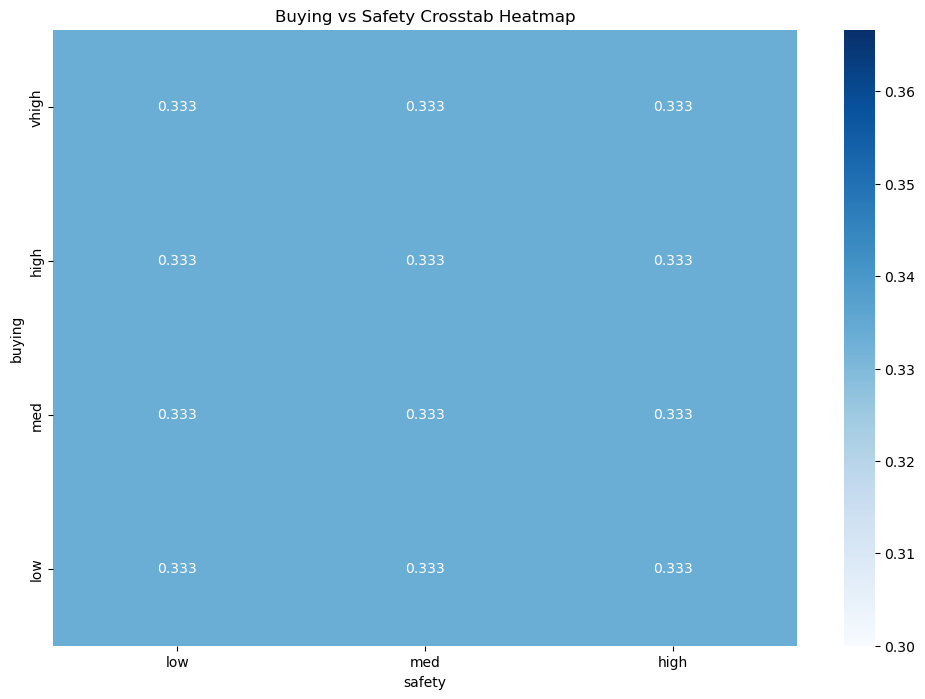

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox 
import pandas as pd
from PIL import Image, ImageTk  # Để xử lý hình ảnh
from data_CRUD import DataProcessing  # Import từ module data_CRUD
from data_cleaning import clean_data
from loc_timkiem import filter_data, get_unique_values, search_data
from sap_xep_du_lieu import sort_data
from visual_data import BieuDo1, BieuDo2, BieuDo3, BieuDo4, BieuDo5, BieuDo6

class CarDataGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Giao diện quản lý dữ liệu car.csv")
        self.root.geometry("570x800")
        #background
        self.root.background = ImageTk.PhotoImage(Image.open("background.jpg").resize((570, 800)))
        self.data_processor = DataProcessing('cars.csv')  # Khởi tạo với file dữ liệu
        self.current_page = 0  # Trang hiện tại
        # Khung chứa nút chức năng
        self.button_frame = ttk.Frame(root)
        # Tải hình ảnh cho các nút chức năng
        self.clean_icon = ImageTk.PhotoImage(Image.open("clean.png").resize((170, 50)))
        self.add_record_icon = ImageTk.PhotoImage(Image.open("add.png").resize((170, 50)))
        self.delete_record_icon = ImageTk.PhotoImage(Image.open("delete.png").resize((170, 50)))
        self.show_table_icon = ImageTk.PhotoImage(Image.open("show.png").resize((170, 50)))
        self.describe_icon = ImageTk.PhotoImage(Image.open("describe.png").resize((170, 50)))
        self.visualize_icon = ImageTk.PhotoImage(Image.open("visual.png").resize((170, 50)))
        self.sort_icon = ImageTk.PhotoImage(Image.open("sort.png").resize((170, 50)))
        self.search_icon = ImageTk.PhotoImage(Image.open("search.png").resize((170, 50)))
        self.filter_icon = ImageTk.PhotoImage(Image.open("filter.png").resize((170, 50)))
        self.update_icon = ImageTk.PhotoImage(Image.open("update.png").resize((170, 50)))
        # Background
        self.bg_label = tk.Label(self.root, image=self.root.background)
        self.bg_label.place(x=0, y=0, relwidth=1, relheight=1) 
        # Tạo các nút chức năng
        self.button_frame = tk.Frame(self.root) # Nút hiển thị bảng dữ liệu
        self.button_frame.place(x=50, y=310)
        tk.Button(self.button_frame, image=self.show_table_icon, command=self.show_table).grid()
        self.button_frame = tk.Frame(self.root) # Nút xóa bản ghi
        self.button_frame.place(x=240, y=350) 
        tk.Button(self.button_frame, image=self.delete_record_icon, command=self.delete_record).grid()
        self.button_frame = tk.Frame(self.root) # Nút làm sạch dữ liệu
        self.button_frame.place(x=50,y=390)
        tk.Button(self.button_frame, image=self.clean_icon, command=self.clean).grid()
        self.button_frame = tk.Frame(self.root) # Nút mô tả dữ liệu
        self.button_frame.place(x=240, y=430) 
        tk.Button(self.button_frame, image=self.describe_icon, command=self.describe).grid()
        self.button_frame = tk.Frame(self.root) # Nút thêm bản ghi
        self.button_frame.place(x=50, y=470)
        tk.Button(self.button_frame, image=self.add_record_icon, command=self.add_record).grid(row=4, column=0)            
        self.button_frame = tk.Frame(self.root) # Nút trực quan hóa
        self.button_frame.place(x=240, y=510) 
        tk.Button(self.button_frame, image=self.visualize_icon, command=self.visualize).grid(row=5, column=0)
        self.button_frame = tk.Frame(self.root) # Nút sắp xếp dữ liệu
        self.button_frame.place(x=50, y=550)
        tk.Button(self.button_frame, image=self.sort_icon, command=self.sort).grid(row=6, column=0)
        self.button_frame = tk.Frame(self.root) # Nút tìm kiếm
        self.button_frame.place(x=240, y=590) 
        tk.Button(self.button_frame, image=self.search_icon, command=self.search).grid(row=7, column=0)
        self.button_frame = tk.Frame(self.root) # Nút lọc dữ liệu
        self.button_frame.place(x=50, y= 630)
        tk.Button(self.button_frame, image=self.filter_icon, command=self.filter).grid(row=8, column=0)
        self.button_frame = tk.Frame(self.root) # Nút cập nhật
        self.button_frame.place(x=240, y= 670)
        tk.Button(self.button_frame, image=self.update_icon, command=self.update).grid(row=8, column=0)

    def display_data(self):
        """ Hiển thị dữ liệu của trang hiện tại trong Treeview. """
        # Xóa dữ liệu cũ trong Treeview
        for row in self.tree.get_children():
            self.tree.delete(row)
        # Lấy dữ liệu của trang hiện tại từ data_processor
        page_data = self.data_processor.display_data()
        # Thêm dữ liệu vào Treeview, bao gồm cả cột index
        for idx, row in page_data.iterrows():
            self.tree.insert('', 'end', values=(idx, *row.tolist()))  # Thêm chỉ số idx làm cột đầu tiên
        # Cập nhật nhãn trang
        total_pages = self.data_processor.get_total_pages()
        self.page_label.config(text=f"Trang: {self.data_processor.current_page + 1}/{total_pages}")
    def next_page(self):
        """ Chuyển đến trang tiếp theo và hiển thị dữ liệu. """
        self.data_processor.next_page()
        self.display_data()
    def previous_page(self):
        """ Quay về trang trước và hiển thị dữ liệu """
        self.data_processor.previous_page()
        self.display_data()
    def goto_page(self):
        """Chuyển đến trang cụ thể dựa trên số trang người dùng nhập."""
        try:
            # Lấy số trang từ Entry
            page_number = int(self.page_entry.get()) - 1 
            total_pages = self.data_processor.get_total_pages() # Tổng số trang
            # Kiểm tra tính hợp lệ của số trang
            if 0 <= page_number < total_pages:
                self.data_processor.current_page = page_number
                self.display_data()
            else:
                messagebox.showwarning("Cảnh báo", f"Số trang không hợp lệ! Vui lòng nhập từ 1 đến {total_pages}.")
        except ValueError:
            messagebox.showerror("Lỗi", "Vui lòng nhập số nguyên hợp lệ!")
    def show_table(self,):
        """Hiển thị bảng dữ liệu trong cửa sổ mới."""
        self.table_window = tk.Toplevel(self.root)
        self.table_window.title("Bảng dữ liệu")
        self.table_window.geometry("900x500")  
        # Lấy tên cột từ DataFrame và thêm cột "index"
        columns = ['index'] + list(self.data_processor.data.columns)
        # Treeview hiển thị dữ liệu
        style = ttk.Style()
        style.configure("Treeview.Heading",foreground="black",   font=("Times new roman", 15, "bold"))  
        self.tree = ttk.Treeview(self.table_window, columns=columns, show='headings')
        for col in columns:
            self.tree.heading(col, text=col)  # Tiêu đề cột 
            self.tree.column(col, anchor='center', width=100)  # Căn giữa và đặt độ rộng
        self.tree.pack(fill=tk.BOTH, expand=True) # Để Treeview mở rộng theo cửa sổ
        # Khung phân trang
        pagination_frame = ttk.Frame(self.table_window)
        pagination_frame.pack(pady=5)

        tk.Button(pagination_frame, text="Trang trước", command=self.previous_page).grid(row=0, column=0, padx=5)
        self.page_label = tk.Label(pagination_frame, text=f"Trang: 1/{self.data_processor.get_total_pages()}")
        self.page_label.grid(row=0, column=1, padx=5)
        tk.Button(pagination_frame, text="Trang sau", command=self.next_page).grid(row=0, column=2, padx=5)

        # Entry và nút nhập số trang
        tk.Label(pagination_frame, text="Nhập trang:").grid(row=1, column=0, padx=5)
        self.page_entry = ttk.Entry(pagination_frame, width=5)
        self.page_entry.grid(row=1, column=1, padx=5)
        tk.Button(pagination_frame, text="Chuyển", command=self.goto_page).grid(row=1, column=2, padx=5)

        # Hiển thị dữ liệu trang đầu tiên
        self.display_data()

    def add_record(self):
        # Hiển thị popup thêm bản ghi mới
        new_window = tk.Toplevel(self.root)
        new_window.title("Thêm bản ghi mới")
        new_window.geometry("400x300")
        # Danh sách các cột và các giá trị duy nhất cho mỗi cột
        fields_with_options = {
            'buying': ['low', 'med', 'high', 'vhigh'],
            'maint': ['low', 'med', 'high', 'vhigh'],
            'doors': ['2', '3', '4', '5more'],
            'persons': ['2', '4', 'more'],
            'lug_boot': ['small', 'med', 'big'],
            'safety': ['low', 'med', 'high'],
            'class': ['unacc', 'acc', 'good', 'vgood']
        }
        entries = {} # Lưu trữ các Combobox
        for idx, (field, options) in enumerate(fields_with_options.items()):
            ttk.Label(new_window, text=field).grid(row=idx, column=0, padx=10, pady=5)
            combobox = ttk.Combobox(new_window, values=options, state="readonly")
            combobox.grid(row=idx, column=1, padx=10, pady=5)
            combobox.set(options[0])
            entries[field] = combobox
        def save_record():
            record = [combobox.get() for combobox in entries.values()]
            if any(not val for val in record):
                messagebox.showwarning("Cảnh báo", "Vui lòng chọn Không lọc các trường!")
                return
            self.data_processor.add_record(record)
            self.data_processor.save_data()
            self.data = self.data_processor.data
            messagebox.showinfo("Thông báo", "Bản ghi đã được thêm!")
            new_window.destroy()
        ttk.Button(new_window, text="Thêm", command=save_record).grid(row=len(fields_with_options), column=0, 
                                                                      columnspan=2, pady=10)

    def delete_record(self):
        delete_window = tk.Toplevel(self.root)
        delete_window.title("Xóa bản ghi")
        delete_window.geometry("300x100")
        # Nhãn và ô nhập ID
        ttk.Label(delete_window, text="Nhập ID cần xóa:").grid(row=0, column=0, padx=5, pady=5)
        id_entry = ttk.Entry(delete_window)
        id_entry.grid(row=0, column=1, padx=5, pady=5)
        def delete_data():
            record_id = id_entry.get()
            if not record_id:
                messagebox.showwarning("Cảnh báo", "Vui lòng nhập ID!")
                return
            self.data_processor.delete_record(int(record_id))
            self.data_processor.save_data()
            self.data = self.data_processor.data 
            messagebox.showinfo("Thông báo", f"Bản ghi với ID {record_id} đã được xóa!")
            delete_window.destroy() # Đóng cửa sổ popup
        ttk.Button(delete_window, text="Xóa", command=delete_data).grid(row=1, column=0, columnspan=2, pady=10)
    
    def clean(self):
        """Làm sạch dữ liệu: Loại bỏ các hàng trùng lặp và các giá trị NULL."""
        try:
            # Gọi hàm làm sạch từ module
            cleaned_data = clean_data("cars.csv")
            # Cập nhật lại dữ liệu đã làm sạch vào data_processor
            self.data_processor.data = cleaned_data
            messagebox.showinfo("Thành công", "Dữ liệu đã được làm sạch thành công!")
        except Exception as e:
            messagebox.showerror("Lỗi", f"Đã xảy ra lỗi khi làm sạch dữ liệu: {e}")

    def describe(self):
        new_window = tk.Toplevel(self.root)
        new_window.title("Mô tả dữ liệu")
        description = self.data_processor.describe_data() # Lấy dữ liệu mô tả từ `data_processor`
        self.display_description_as_table(new_window, description) # Hiển thị DataFrame trong Treeview
        tk.Button(new_window, text="Đóng", command=new_window.destroy).pack(pady=10) # Nút đóng cửa sổ
    def display_description_as_table(self, window, description):
        """Hiển thị DataFrame dưới dạng bảng trong Treeview."""
        # Tạo Treeview với các cột từ DataFrame
        tree = ttk.Treeview(window, columns=list(description.columns), show='headings')
        for col in description.columns:
            tree.heading(col, text=col)
            tree.column(col, anchor='center', width=150)  # Đặt độ rộng cột
        tree.pack(fill=tk.BOTH, expand=True) 
        # Thêm dữ liệu từ DataFrame vào Treeview
        for _, row in description.iterrows():
            tree.insert('', 'end', values=row.tolist())
    
    def filter(self):
        """Hiển thị popup để người dùng chọn giá trị lọc cho từng cột."""
        filter_window = tk.Toplevel(self.root)
        filter_window.title("Lọc dữ liệu")
        # Danh sách các cột cần lọc
        columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
        entries = {}  # Lưu trữ các Combobox
        # Tạo giao diện chọn giá trị cho từng cột
        for idx, column in enumerate(columns):
            tk.Label(filter_window, text=f"Lọc theo '{column}':").grid(row=idx, column=0)
            # Lấy các giá trị duy nhất từ cột
            unique_values = get_unique_values(self.data_processor.data, column)
             # Thêm "(Không lọc)" vào danh sách giá trị
            combobox = ttk.Combobox(filter_window, values=['(Không lọc)'] + unique_values, state="readonly") 
            combobox.grid(row=idx, column=1)
            combobox.set('(Không lọc)')  # Đặt giá trị mặc định là "(Không lọc)"
            entries[column] = combobox
        # Nút thực hiện lọc
        def apply_filter():
            # Áp dụng lọc tuần tự
            for column, combobox in entries.items():
                value = combobox.get() # Lấy giá trị từ Combobox
                if value != '(Không lọc)':  # Chỉ lọc nếu không phải "(Không lọc)"
                    self.data_processor.data = filter_data(self.data_processor.data, column, value)
            if self.data_processor.data.empty:
                messagebox.showwarning("Cảnh báo", "Không tìm thấy dữ liệu phù hợp!")
            else:
                self.show_table()  
            # Reset về dữ liệu gốc sau khi thực hiện lọc
            self.data_processor.data = pd.read_csv('cars.csv') 
            filter_window.destroy() # Đóng cửa sổ popup
        tk.Button(filter_window, text="Lọc", command=apply_filter).grid(row=len(columns), column=0, 
                                                                        columnspan=2, pady=20)

    def update(self):
        """Cập nhật giá trị trong bản ghi dựa trên ID."""
        update_window = tk.Toplevel(self.root)
        update_window.title("Cập nhật bản ghi")
        tk.Label(update_window, text="Nhập ID cần cập nhật:").grid(padx=5, pady=5)
        id_entry = ttk.Entry(update_window)
        id_entry.grid(row=0, column=1, padx=10, pady=5)
        # Tạo Combobox cho mỗi thuộc tính (cột trong DataFrame)
        attribute_entries = {}
        for idx, column in enumerate(self.data_processor.data.columns):
            tk.Label(update_window, text=f"{column}:").grid(row=idx + 1, column=0, padx=10, pady=5)
             # Lấy giá trị duy nhất không NULL
            unique_values = self.data_processor.data[column].dropna().unique().tolist() 
            combobox = ttk.Combobox(update_window, values=['(Không cập nhật)'] + unique_values,
                                                                     state="readonly", width=30)
            combobox.grid(row=idx + 1, column=1, padx=10, pady=5)
            combobox.set('(Không cập nhật)')  # Mặc định là "Không cập nhật"
            attribute_entries[column] = combobox
        def apply_update():
            try:
                # Lấy ID từ Entry
                record_id = int(id_entry.get().strip())
                # Kiểm tra ID có tồn tại không
                if record_id < 0 or record_id >= len(self.data_processor.data):
                    messagebox.showerror("Lỗi", f"ID {record_id} không tồn tại.")
                    return
                # Tạo dictionary cho các thay đổi
                updates = {col: combo.get() for col, combo in attribute_entries.items() 
                                                                    if combo.get() != '(Không cập nhật)'}
                # Gọi module DataProcessing để cập nhật
                if updates:
                    self.data_processor.update_record(record_id, updates)
                    self.data_processor.save_data()
                    messagebox.showinfo("Thành công", f"Đã cập nhật ID {record_id}:\n{updates}")
                    update_window.destroy()
                else:
                    messagebox.showinfo("Thông báo", "Không có thay đổi nào được thực hiện.")
            except ValueError:
                messagebox.showerror("Lỗi", "Vui lòng nhập ID hợp lệ.")
            except Exception as e:
                messagebox.showerror("Lỗi", f"Đã xảy ra lỗi: {e}")
        ttk.Button(update_window, text="Cập nhật", command=apply_update).grid(
                                row=len(self.data_processor.data.columns) + 1, column=0, columnspan=2, pady=20)
    
    def sort(self):
        """Hiển thị popup để người dùng chọn cột và thứ tự sắp xếp."""
        sort_window = tk.Toplevel(self.root)
        sort_window.title("Sắp xếp dữ liệu")
        # Danh sách các cột có thể sắp xếp
        columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
        # Tạo Combobox để chọn cột
        tk.Label(sort_window, text="Chọn cột để sắp xếp:").grid(row=0, column=0)
        column_combobox = ttk.Combobox(sort_window, values=columns, state="readonly") 
        column_combobox.grid(row=0, column=1, padx=10, pady=10) # Đặt Combobox vào cửa sổ
        column_combobox.set(columns[0])  # Giá trị mặc định là cột đầu tiên
        # Tạo Combobox để chọn thứ tự sắp xếp
        tk.Label(sort_window, text="Thứ tự sắp xếp:").grid(row=1, column=00)
        order_combobox = ttk.Combobox(sort_window, values=["Tăng dần", "Giảm dần"], state="readonly")
        order_combobox.grid(row=1, column=1, padx=10, pady=10)
        order_combobox.set("Tăng dần")  # Giá trị mặc định là "Tăng dần"
        def apply_sort():
            try:
                # Lấy cột và thứ tự sắp xếp từ Combobox
                sort_column = column_combobox.get()
                ascending_order = order_combobox.get() == "Tăng dần"
                # Thực hiện sắp xếp
                self.data_processor.data = sort_data(self.data_processor.data, sort_column, ascending_order)
                self.show_table() # Hiển thị dữ liệu đã sắp xếp
                # Thông báo thành công
                messagebox.showinfo("Thành công", f"Dữ liệu đã được sắp xếp theo cột 
                                        '{sort_column}' ({'Tăng dần' if ascending_order else 'Giảm dần'}).")
                sort_window.destroy()
            except Exception as e:
                messagebox.showerror("Lỗi", f"Đã xảy ra lỗi khi sắp xếp dữ liệu: {e}")
        tk.Button(sort_window, text="Sắp xếp", command=apply_sort).grid(row=2, column=0, columnspan=2,)

    def search(self):
        """Tìm kiếm bản ghi theo ID và hiển thị kết quả."""
        search_window = tk.Toplevel(self.root)
        search_window.title("Tìm kiếm bản ghi")
        tk.Label(search_window, text="Nhập ID cần tìm:").pack(pady=5)
        id_entry = tk.Entry(search_window)
        id_entry.pack(pady=5,padx = 5)
        def perform_search():
            search_id = id_entry.get().strip() # Lấy ID từ Entry, strip() để loại bỏ khoảng trắng
            if not search_id.isdigit():
                messagebox.showerror("Lỗi", "ID phải là số nguyên!")
                return
            search_id = int(search_id)
            result = search_data(self.data_processor.data, 'index', search_id) 
            print(result)
            if isinstance(result, pd.DataFrame) and not result.empty: 
                # Định dạng chi tiết bản ghi trực tiếp từ hàng duy nhất
                record_details = "\n".join([f"{col}: {val}" for col, val in result.iloc[0].items()])  
                messagebox.showinfo("Kết quả", f"Đã tìm thấy bản ghi:\n\n{record_details}")
            else:
                messagebox.showinfo("Không tìm thấy", f"Không có bản ghi với ID: {search_id}")
            search_window.destroy()
        tk.Button(search_window, text="Tìm kiếm", command=perform_search).pack()

    def visualize(self):
        """Hiển thị popup để người dùng chọn loại biểu đồ trực quan."""
        visualize_window = tk.Toplevel(self.root)
        visualize_window.title("Trực quan hóa dữ liệu")
        # Loại biểu đồ được định nghĩa trước
        chart_types = {
            "Phân tích sự phân phối các biến trong đánh giá ô tô": BieuDo1,
            "Phân tích ảnh hưởng của các thuộc tính xe hơi đến đánh giá chất lượng": BieuDo2,
            "Phân tích mối quan hệ giữa giá mua và mức độ an toàn của xe": BieuDo3,
            "Sự phân bố các lớp xe dựa trên giá mua và chi phí bảo dưỡng": BieuDo4,
            "Mối quan hệ giữa các đặc điểm khác nhau của xe và cách chúng phân bố theo các lớp xe": BieuDo5,
            "thống kê số lượng xe dựa trên mức đánh giá": BieuDo6
        }
        # Combobox chọn loại biểu đồ
        tk.Label(visualize_window, text="Chọn loại biểu đồ:").pack(pady=5)
        chart_combobox = ttk.Combobox(visualize_window, values=list(chart_types.keys()), state="readonly",width=60)
        chart_combobox.pack(padx=10)
        chart_combobox.set(list(chart_types.keys())[0])
        def apply_visualize():
            """Thực hiện trực quan hóa dữ liệu."""
            chart_type = chart_combobox.get()
            try:
                if chart_type in chart_types:
                    chart_types[chart_type]()  # Gọi hàm biểu đồ tương ứng
                    visualize_window.destroy()
            except Exception as e:
                messagebox.showerror("Lỗi", f"Đã xảy ra lỗi khi trực quan hóa dữ liệu: {e}")
        tk.Button(visualize_window, text="Áp dụng", command=apply_visualize).pack()

if __name__ == "__main__":
    root = tk.Tk()
    app = CarDataGUI(root)
    root.mainloop()
